In [1]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats, interpolate
import tensorboard as tb

major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.9.1


In [2]:
experiment_id = "D8ERjW59RAKesmIQcMR1kg"
experiment = tb.data.experimental.ExperimentFromDev(experiment_id)
df = experiment.get_scalars()
df

,run,tag,step,value
0,Efficient-3DCNN_1,training_acc,1,0.142857
1,Efficient-3DCNN_1,training_acc,2,0.098214
2,Efficient-3DCNN_1,training_acc,3,0.160714
3,Efficient-3DCNN_1,training_acc,4,0.187500
4,Efficient-3DCNN_1,training_acc,5,0.178571
...,...,...,...,...
703,Efficient-3DCNN_1,validation_loss,173,0.312739
704,Efficient-3DCNN_1,validation_loss,174,0.562033
705,Efficient-3DCNN_1,validation_loss,175,0.388727
706,Efficient-3DCNN_1,validation_loss,176,0.644782


In [3]:
print(df["run"].unique())
print(df["tag"].unique())

['Efficient-3DCNN_1']
['training_acc' 'training_loss' 'validation_acc' 'validation_loss']


In [4]:
dfw = experiment.get_scalars(pivot=False) 
dfw

,run,tag,step,value
0,Efficient-3DCNN_1,training_acc,1,0.142857
1,Efficient-3DCNN_1,training_acc,2,0.098214
2,Efficient-3DCNN_1,training_acc,3,0.160714
3,Efficient-3DCNN_1,training_acc,4,0.187500
4,Efficient-3DCNN_1,training_acc,5,0.178571
...,...,...,...,...
703,Efficient-3DCNN_1,validation_loss,173,0.312739
704,Efficient-3DCNN_1,validation_loss,174,0.562033
705,Efficient-3DCNN_1,validation_loss,175,0.388727
706,Efficient-3DCNN_1,validation_loss,176,0.644782


In [5]:
csv_path = 'experiment_1.csv'
dfw.to_csv(csv_path, index=False)
dfw_roundtrip = pd.read_csv(csv_path)
pd.testing.assert_frame_equal(dfw_roundtrip, dfw)

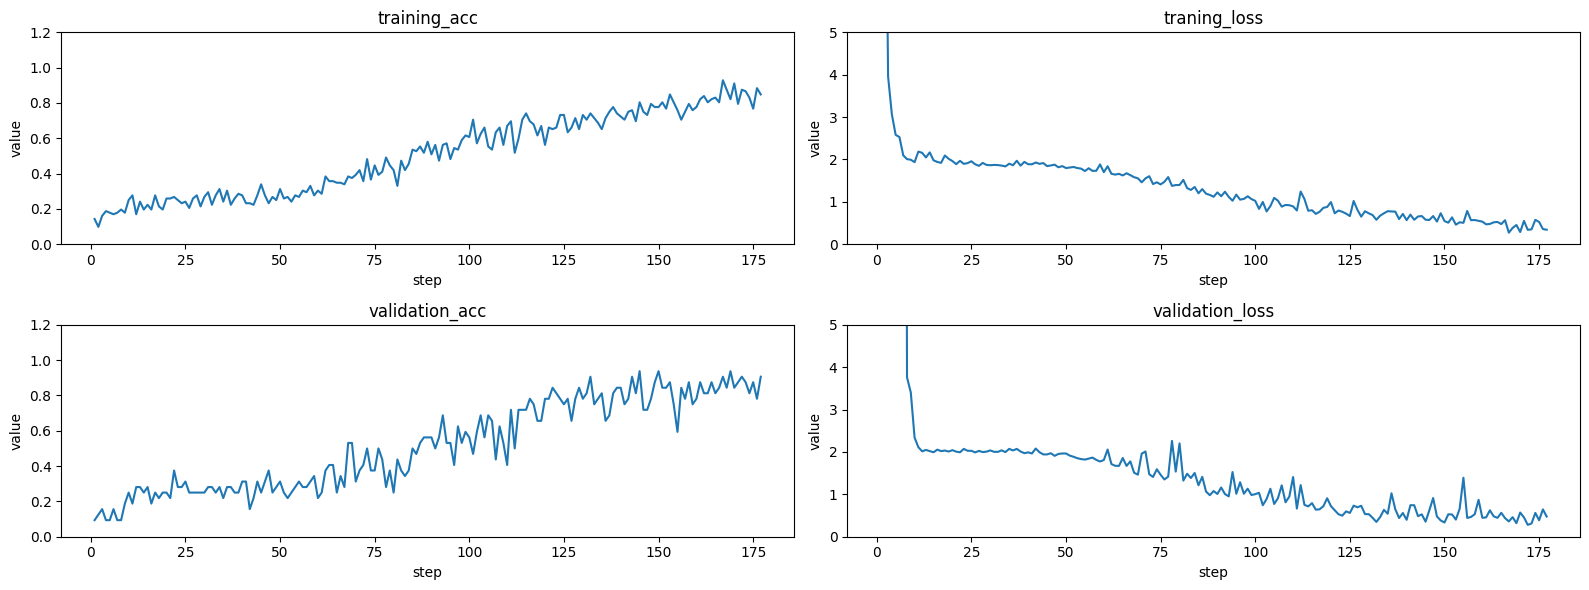

In [7]:
import numpy as np

dfw_traningacc = dfw[dfw.tag.str.startswith("training_acc")]
dfw_traningloss = dfw[dfw.tag.str.startswith("training_loss")]
dfw_validationacc = dfw[dfw.tag.str.startswith("validation_acc")]
dfw_validationloss = dfw[dfw.tag.str.startswith("validation_loss")]
# Get the optimizer value for each row of the validation DataFrame.
fig = plt.figure(figsize=(16, 6), dpi=100)

ax1 = fig.add_subplot(221)
ax1.set(ylim=(0, 1.2))
sns.lineplot(data=dfw_traningacc, x="step", y="value",
             ax=ax1).set_title("traning_acc")
ax1.set_title('training_acc')

ax2 = fig.add_subplot(222)
ax2.set(ylim=(0, 5))
sns.lineplot(data=dfw_traningloss, x="step", y="value",
             ax=ax2).set_title("traning_loss")

ax3 = fig.add_subplot(223)
ax3.set(ylim=(0, 1.2))
sns.lineplot(data=dfw_validationacc, x="step", y="value",
             ax=ax3).set_title("validation_acc")
ax3.set_title('validation_acc')

ax4 = fig.add_subplot(224)
ax4.set(ylim=(0, 5))
sns.lineplot(data=dfw_validationloss, x="step", y="value",
             ax=ax4).set_title("validation_loss")

plt.tight_layout()